In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
train=pd.read_csv("D:/Pallavi/Data Science/Programming/Python/loan prediction/train.csv")
test=pd.read_csv("D:/Pallavi/Data Science/Programming/Python/loan prediction/test.csv")
loan=train.append(test)

In [77]:
print(train.shape)
print(test.shape)
print(loan.shape)

(614, 13)
(367, 12)
(981, 13)


In [78]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [79]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [80]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [81]:
loan.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

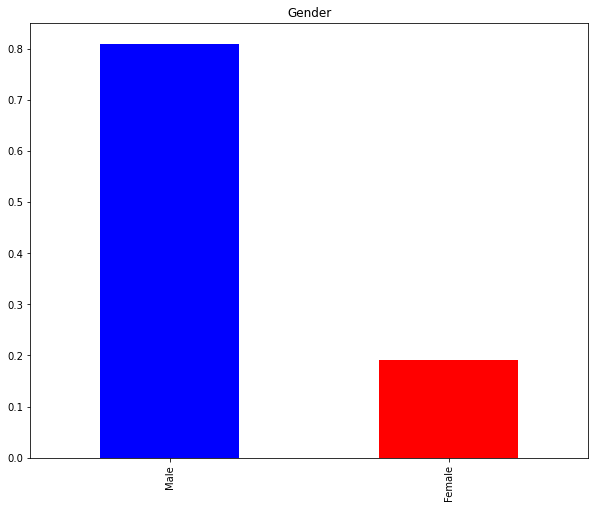

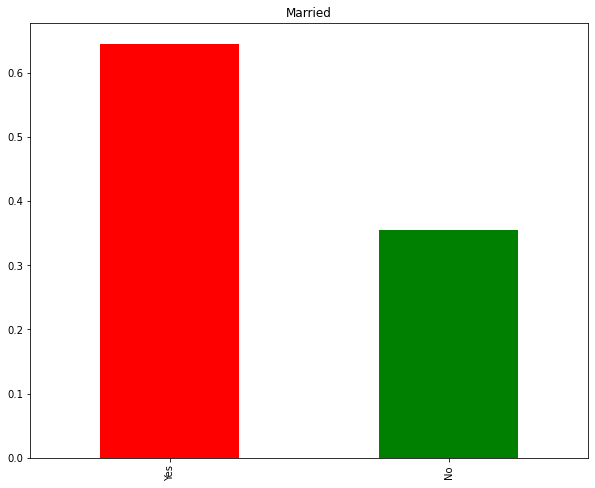

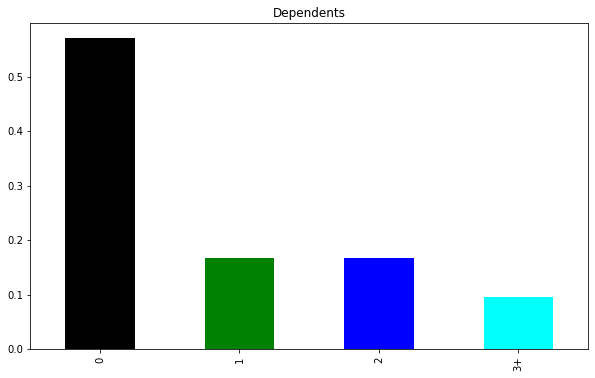

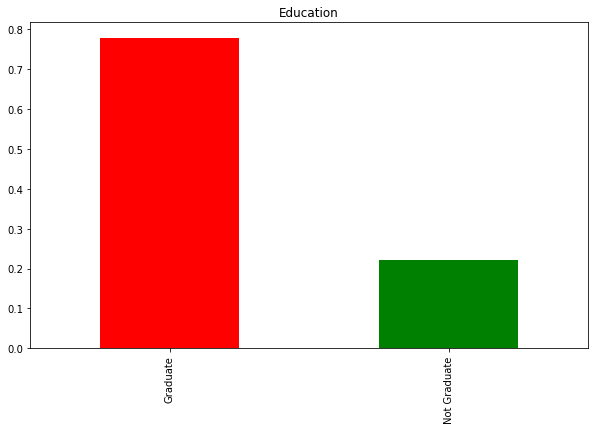

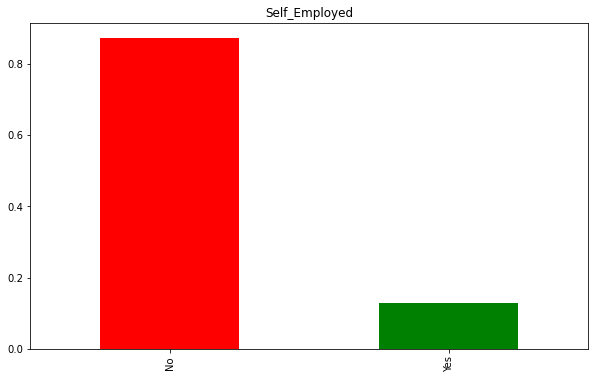

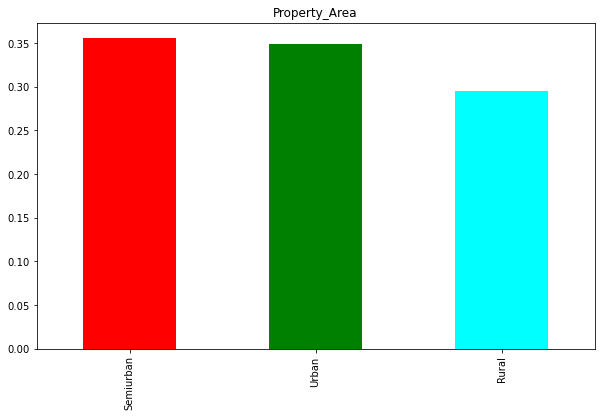

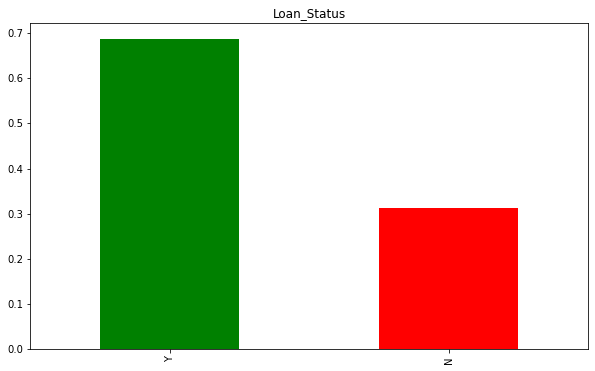

In [82]:
loan['Gender'].value_counts(normalize=True).plot.bar(figsize=(10,8), title="Gender", color=['blue', 'red'])
plt.show()
loan['Married'].value_counts(normalize=True).plot.bar(figsize=(10,8), title='Married',color=['red', 'green'])
plt.show()
loan['Dependents'].value_counts(normalize=True).plot.bar(figsize=(10,6), title='Dependents', color=['black', 'green', 'blue', 'cyan'])
plt.show()
loan["Education"].value_counts(normalize=True).plot.bar(figsize=(10,6), title='Education', color=['red', 'green'])
plt.show()
loan["Self_Employed"].value_counts(normalize=True).plot.bar(figsize=(10,6), title='Self_Employed', color=['red', 'green'])
plt.show()                                          
loan["Property_Area"].value_counts(normalize=True).plot.bar(figsize=(10,6), title='Property_Area', color=['red', 'green', 'cyan'])
plt.show()                                          
loan["Loan_Status"].value_counts(normalize=True).plot.bar(figsize=(10,6), title='Loan_Status', color=['green', 'red'])
plt.show()                                          

In [83]:
loan.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.114247,0.551811,-0.023089,0.023378
CoapplicantIncome,-0.114247,1.000000,0.179228,-0.043860,-0.027253
LoanAmount,0.551811,0.179228,1.000000,0.055636,-0.008235
Loan_Amount_Term,-0.023089,-0.043860,0.055636,1.000000,-0.020439
Credit_History,0.023378,-0.027253,-0.008235,-0.020439,1.000000


In [84]:
loan["Gender"].fillna(method='bfill',inplace=True)
loan["Loan_Amount_Term"].fillna(method='bfill',inplace=True)
loan["Credit_History"].fillna(method='bfill',inplace=True)

In [85]:
loan.isnull().sum()

Loan_ID                0
Gender                 0
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

In [86]:
pd.crosstab(loan["Married"],loan['Dependents'])

Dependents,0,1,2,3+
Married,,,,
No,276,36,14,12
Yes,269,124,146,79


In [87]:
pd.crosstab(loan["Education"],loan['Dependents'])

Dependents,0,1,2,3+
Education,,,,
Graduate,435,128,118,62
Not Graduate,110,32,42,29


In [88]:
loan["Dependents"].value_counts()

0     545
1     160
2     160
3+     91
Name: Dependents, dtype: int64

In [89]:
loan["Dependents"].fillna("missing",inplace=True)

In [90]:
loan["Dependents"].value_counts()

0          545
1          160
2          160
3+          91
missing     25
Name: Dependents, dtype: int64

In [91]:
loan.isnull().sum()

Loan_ID                0
Gender                 0
Married                3
Dependents             0
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

In [92]:
pd.crosstab(loan.Self_Employed.fillna("MISSING"),loan.Education)

Education,Graduate,Not Graduate
Self_Employed,,
MISSING,43,12
No,626,181
Yes,94,25


In [93]:
loan["Self_Employed"].fillna("No",inplace=True)

In [94]:
loan.isnull().sum()

Loan_ID                0
Gender                 0
Married                3
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

In [95]:
loan_MVT=loan[["Loan_ID","ApplicantIncome","CoapplicantIncome","LoanAmount"]]

In [96]:
loan_MVT

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount
0,LP001002,5849,0.0,NaN
1,LP001003,4583,1508.0,128.0
2,LP001005,3000,0.0,66.0
3,LP001006,2583,2358.0,120.0
4,LP001008,6000,0.0,141.0
...,...,...,...,...
362,LP002971,4009,1777.0,113.0
363,LP002975,4158,709.0,115.0
364,LP002980,3250,1993.0,126.0
365,LP002986,5000,2393.0,158.0


In [97]:
train_MVT=loan_MVT[loan.LoanAmount.notnull()]
test_MVT=loan_MVT[loan.LoanAmount.isnull()]

In [98]:
train_MVT.shape,test_MVT.shape

((954, 4), (27, 4))

In [99]:
Y_MVT=train_MVT.LoanAmount
X_MVT=train_MVT.drop("LoanAmount",axis=1)
z_MVT=test_MVT.drop(["LoanAmount"],axis=1)

In [100]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_MVT.drop("Loan_ID",axis=1),Y_MVT)

LinearRegression()

In [101]:
model=LR.predict(z_MVT.drop("Loan_ID",axis=1))

In [102]:
model

array([136.77697977, 123.01263737, 129.70117491, 109.7417696 ,
       144.07977395, 197.8371056 , 152.04007383, 149.31618264,
       132.52239008, 122.24183637, 252.76069269, 106.65001858,
       130.11226647, 105.31939156, 136.11476346, 169.63563997,
       116.05132368, 125.08263795, 141.97459136, 142.91351851,
       126.82857045, 135.90500286, 145.57328935, 108.70074963,
       193.39907312, 169.26776074, 183.71883837])

In [103]:
loan["Loan_ID"].loc[loan.LoanAmount.isnull()]

0      LP001002
35     LP001106
63     LP001213
81     LP001266
95     LP001326
102    LP001350
103    LP001356
113    LP001392
127    LP001449
202    LP001682
284    LP001922
305    LP001990
322    LP002054
338    LP002113
387    LP002243
435    LP002393
437    LP002401
479    LP002533
524    LP002697
550    LP002778
551    LP002784
605    LP002960
78     LP001415
101    LP001542
188    LP002057
247    LP002360
289    LP002593
Name: Loan_ID, dtype: object

In [104]:
loan.loc[loan.LoanAmount.isna(), 'LoanAmount'] = model

In [105]:
loan.loc[35]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,123.012637,360.0,1.0,Urban,Y
35,LP001203,Male,No,0,Graduate,No,3150,0.0,176.000000,360.0,0.0,Semiurban,NaN


In [106]:
loan.isnull().sum()

Loan_ID                0
Gender                 0
Married                3
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

In [107]:
del loan["Loan_ID"]

In [108]:
del loan["Married"]

In [109]:
del loan["Gender"]

In [110]:
loan.isnull().sum()

Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

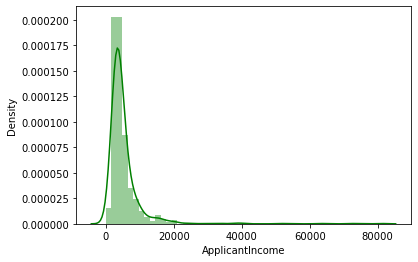

In [111]:
sns.distplot(loan.ApplicantIncome, color="green")

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

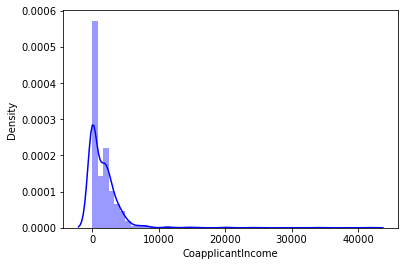

In [112]:
sns.distplot(loan.CoapplicantIncome, color="blue")

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

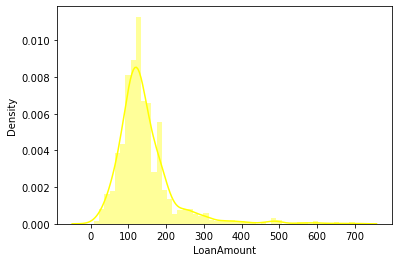

In [113]:
sns.distplot(loan.LoanAmount, color="yellow")

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

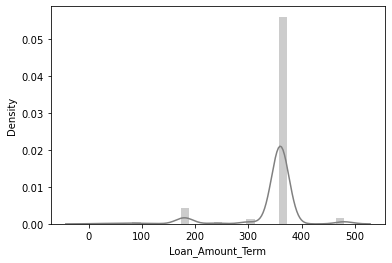

In [114]:
sns.distplot(loan.Loan_Amount_Term, color="gray")

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

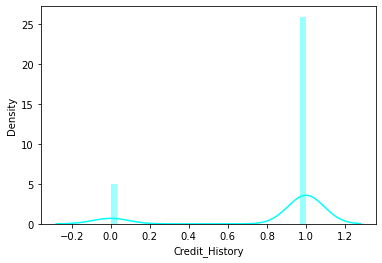

In [115]:
sns.distplot(loan.Credit_History, color="cyan")

<AxesSubplot:>

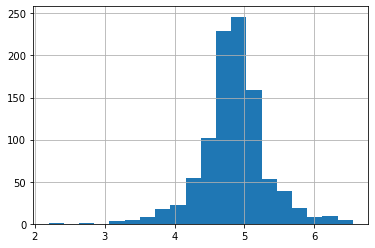

In [116]:
loan['LoanAmount_log']=np.log(loan['LoanAmount'])
loan['LoanAmount_log'].hist(bins=20)

In [117]:
loan.head()

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,0,Graduate,No,5849,0.0,136.77698,360.0,1.0,Urban,Y,4.918352
1,1,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,N,4.852030
2,0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,Y,4.189655
3,0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,Y,4.787492
4,0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,Y,4.948760


In [120]:
loan1=loan.copy()

In [121]:
del loan1["LoanAmount"]

In [122]:
pdloan=pd.get_dummies(loan1.drop("Loan_Status",axis=1))

In [123]:
pdloan

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,LoanAmount_log,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Dependents_missing,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,360.0,1.0,4.918352,1,0,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,360.0,1.0,4.852030,0,1,0,0,0,1,0,1,0,1,0,0
2,3000,0.0,360.0,1.0,4.189655,1,0,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,360.0,1.0,4.787492,1,0,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,360.0,1.0,4.948760,1,0,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777.0,360.0,1.0,4.727388,0,0,0,1,0,0,1,0,1,0,0,1
363,4158,709.0,360.0,1.0,4.744932,1,0,0,0,0,1,0,1,0,0,0,1
364,3250,1993.0,360.0,1.0,4.836282,1,0,0,0,0,1,0,1,0,0,1,0
365,5000,2393.0,360.0,1.0,5.062595,1,0,0,0,0,1,0,1,0,1,0,0


In [124]:
loan4=pd.concat([pdloan,loan1["Loan_Status"]],axis=1)

In [125]:
loan4

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,LoanAmount_log,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Dependents_missing,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5849,0.0,360.0,1.0,4.918352,1,0,0,0,0,1,0,1,0,0,0,1,Y
1,4583,1508.0,360.0,1.0,4.852030,0,1,0,0,0,1,0,1,0,1,0,0,N
2,3000,0.0,360.0,1.0,4.189655,1,0,0,0,0,1,0,0,1,0,0,1,Y
3,2583,2358.0,360.0,1.0,4.787492,1,0,0,0,0,0,1,1,0,0,0,1,Y
4,6000,0.0,360.0,1.0,4.948760,1,0,0,0,0,1,0,1,0,0,0,1,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777.0,360.0,1.0,4.727388,0,0,0,1,0,0,1,0,1,0,0,1,NaN
363,4158,709.0,360.0,1.0,4.744932,1,0,0,0,0,1,0,1,0,0,0,1,NaN
364,3250,1993.0,360.0,1.0,4.836282,1,0,0,0,0,1,0,1,0,0,1,0,NaN
365,5000,2393.0,360.0,1.0,5.062595,1,0,0,0,0,1,0,1,0,1,0,0,NaN


In [126]:
test_a=loan4[loan4['Loan_Status'].isnull()]
train_b=loan4[loan4['Loan_Status'].notnull()]

In [127]:
test_a.shape,train_b.shape

((367, 18), (614, 18))

In [128]:
train_y=train_b["Loan_Status"]
train_x=train_b.drop("Loan_Status",axis=1)
Test_x=test_a.drop(["Loan_Status"],axis=1)

In [129]:
train_y.shape,train_x.shape,Test_x.shape

((614,), (614, 17), (367, 17))

In [130]:
train_z=train_y.copy()

In [131]:
train_z.replace({'Y':1,'N':0},inplace=True)

In [132]:
!pip install lightgbm

In [133]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(train_x,train_z)

LGBMClassifier()

In [134]:
new_predict=clf.predict(Test_x)
new_predict

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,

In [135]:
model_lgbm=pd.concat([test["Loan_ID"],round(pd.DataFrame(new_predict),1)],axis=1)

In [136]:
model_lgbm

,Loan_ID,0
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,0
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,0


In [137]:
model_lgbm.rename(columns = {0:'Loan_Status'}, inplace = True)

In [138]:
model_lgbm["Loan_Status"].replace({1:'Y',0:'N'},inplace=True)

In [139]:
model_lgbm.Loan_Status.value_counts(normalize=True)

Y    0.746594
N    0.253406
Name: Loan_Status, dtype: float64

In [140]:
model_lgbm.to_csv("Sol26lgbmgender.csv",index=False)